In [2]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import aic, bic
from sklearn.metrics import r2_score
import patsy


In [3]:
df_90s = pd.read_csv(r'D:\vr-pipeline\data\results\22052025_segment_data_t123_90s_1s_ketone.csv')
df_45s= pd.read_csv(r'D:\vr-pipeline\data\results\22052025_segment_data_t123_45s_45s_ketone.csv')
df_30s = pd.read_csv(r'D:\vr-pipeline\data\results\22052025_segment_data_t123_30s_30s_ketone.csv')

# Example: Load datasets
df_90s['segmentation'] = '90s_1s'
df_45s['segmentation'] = '45s_1s'
df_30s['segmentation'] = '30s_30s'   

df_all = pd.concat([df_90s, df_45s, df_30s], ignore_index=True)

In [4]:
scene_map = {7: 'empty_room', 11: 'elevated_platform', 15: 'dark_maze'}
df_all['scene'] = df_all['trial'].map(scene_map)

In [5]:
df_all['unsafe_time_spent']= df_all['unsafe_time_spent'] + df_all['outside_time_spent']

In [6]:
safe_area_explored = df_all['safe_area_coverage'] * 4.9392 / 100
unsafe_area_explored = df_all['unsafe_area_coverage'] * 5.9628 / 100

total_explored = safe_area_explored + unsafe_area_explored
unsafe_proportion = safe_area_explored / total_explored
df_all['unsafe_proportion'] = unsafe_proportion

# 90s analysis

## empty room

In [7]:
features = ['speed', 'acceleration', 'stops_duration', 'area_covered',            
           'center_dist', 'edge_dist', 'max_distance', 'rmssd']

In [8]:
df_90= df_all[df_all['segmentation'] == '90s_1s']

In [9]:
df_90

,participant_id,session,trial,version,segment,center_dist,edge_dist,speed,acceleration,stops_count,...,hr,safe_area_coverage,unsafe_area_coverage,safe_time_spent,unsafe_time_spent,outside_time_spent,drink,segmentation,scene,unsafe_proportion
0,EK_207,1,7,2,0,1.786122,0.682355,0.301608,9.471821,7,...,64.775962,NaN,NaN,NaN,NaN,NaN,ketone,90s_1s,empty_room,NaN
1,EK_207,1,11,2,0,1.722617,0.444282,0.217711,1.384794,7,...,67.905104,24.451637,27.748409,27.6877,63.3104,4.7784,ketone,90s_1s,elevated_platform,0.421939
2,EK_207,1,15,2,0,3.798371,0.989149,0.227798,5.462296,17,...,64.775962,NaN,NaN,NaN,NaN,NaN,ketone,90s_1s,dark_maze,NaN
3,EK_207,2,7,1,0,2.063429,0.536975,0.299718,7.567392,10,...,77.029738,NaN,NaN,NaN,NaN,NaN,placebo,90s_1s,empty_room,NaN
4,EK_207,2,11,1,0,2.120893,0.213506,0.216673,1.415689,6,...,76.467968,8.689104,44.013514,7.0527,83.9269,37.8536,placebo,90s_1s,elevated_platform,0.140546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,EK_993,1,11,2,0,1.745195,0.471989,0.153207,-0.065224,10,...,85.963576,17.933418,12.994024,60.7255,30.0578,0.8002,ketone,90s_1s,elevated_platform,0.533410
122,EK_993,1,15,2,0,1.175731,1.094365,0.132653,0.042400,25,...,77.500878,NaN,NaN,NaN,NaN,NaN,ketone,90s_1s,dark_maze,NaN
123,EK_993,2,7,1,0,1.711366,0.722255,0.471924,0.262048,4,...,75.868578,NaN,NaN,NaN,NaN,NaN,placebo,90s_1s,empty_room,NaN
124,EK_993,2,11,1,0,1.768883,0.391949,0.154720,-0.019245,23,...,78.845260,13.658604,20.217094,17.7940,73.1970,40.2520,placebo,90s_1s,elevated_platform,0.358819


In [10]:
df_90.describe()

,session,trial,version,segment,center_dist,edge_dist,speed,acceleration,stops_count,stops_duration,max_distance,area_covered,rmssd,hr,safe_area_coverage,unsafe_area_coverage,safe_time_spent,unsafe_time_spent,outside_time_spent,unsafe_proportion
count,126.000000,126.000000,126.000000,126.0,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,1.500000,11.000000,1.500000,0.0,2.187701,0.588548,0.291115,2.829181,10.936508,20.540179,5.266978,10.361875,39.546451,79.780400,23.893769,19.829854,47.226660,43.754540,8.396824,0.547430
std,0.501996,3.279024,0.501996,0.0,0.877334,0.247422,0.141660,7.096744,7.120389,16.272284,1.571148,7.962228,26.882773,14.051320,13.116308,13.911431,29.630691,29.633816,15.653029,0.260647
min,1.000000,7.000000,1.000000,0.0,0.271441,0.039330,0.033011,-0.116480,1.000000,2.469800,0.349207,0.000000,4.679834,57.566138,0.019090,0.000000,0.000000,0.000000,0.000000,0.000870
25%,1.000000,7.000000,1.000000,0.0,1.726752,0.372040,0.197092,0.041731,5.000000,8.247750,4.797505,1.463205,24.165444,72.235140,14.115602,8.054360,24.057025,12.666525,0.000000,0.375226
50%,1.500000,11.000000,1.500000,0.0,1.952288,0.611660,0.268954,0.157247,10.000000,16.836900,5.536549,12.097270,33.588821,77.141361,24.126852,20.755557,37.788750,53.203250,1.899400,0.503248
75%,2.000000,15.000000,2.000000,0.0,2.432622,0.763380,0.369178,0.426881,16.000000,26.156125,6.619716,16.942737,42.436227,84.225141,31.488037,28.901533,78.318075,66.929150,9.516275,0.759782
max,2.000000,15.000000,2.000000,0.0,5.216296,1.176308,0.786835,45.459198,37.000000,79.651400,7.181036,29.459771,140.363484,119.575372,54.559138,47.654816,90.991000,90.979000,66.240600,1.000000


In [11]:
df_90.dtypes

participant_id           object
session                   int64
trial                     int64
version                   int64
segment                   int64
center_dist             float64
edge_dist               float64
speed                   float64
acceleration            float64
stops_count               int64
stops_duration          float64
max_distance            float64
area_covered            float64
rmssd                   float64
hr                      float64
safe_area_coverage      float64
unsafe_area_coverage    float64
safe_time_spent         float64
unsafe_time_spent       float64
outside_time_spent      float64
drink                    object
segmentation             object
scene                    object
unsafe_proportion       float64
dtype: object

In [1]:
df_90_empty_room = df_90[df_90['scene'] == 'empty_room'] 
for feature in features:
    model = smf.mixedlm(f"{feature} ~ drink + session",
                        data=df_90_empty_room,
                        groups=df_90_empty_room["participant_id"])
    result = model.fit()
    print(result.summary())

NameError: name 'df_90' is not defined

In [13]:
features = ['speed', 'acceleration', 'stops_count', 'area_covered',            
           'center_dist', 'edge_dist', 'max_distance', 'rmssd', 'safe_area_coverage',
           'unsafe_area_coverage', 'safe_time_spent', 'unsafe_time_spent', 'unsafe_proportion']

In [14]:
df_90_elevated_platform = df_90[df_90['scene'] == 'elevated_platform'] 
for feature in features:
    model = smf.mixedlm(f"{feature} ~ drink + session",
                        data=df_90_elevated_platform,
                        groups=df_90_elevated_platform["participant_id"])
    result = model.fit()
    print(result.summary())

          Mixed Linear Model Regression Results
Model:              MixedLM  Dependent Variable:  speed  
No. Observations:   42       Method:              REML   
No. Groups:         21       Scale:               0.0008 
Min. group size:    2        Log-Likelihood:      54.3651
Max. group size:    2        Converged:           Yes    
Mean group size:    2.0                                  
---------------------------------------------------------
                 Coef. Std.Err.   z   P>|z| [0.025 0.975]
---------------------------------------------------------
Intercept        0.167    0.021 8.070 0.000  0.127  0.208
drink[T.placebo] 0.005    0.009 0.592 0.554 -0.012  0.023
session          0.009    0.009 1.026 0.305 -0.008  0.027
Group Var        0.004    0.073                          

           Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: acceleration
No. Observations:  42      Method:             REML        
No. Groups:        21      S

d:\vr-pipeline\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


           Mixed Linear Model Regression Results
Model:              MixedLM Dependent Variable: stops_count
No. Observations:   42      Method:             REML       
No. Groups:         21      Scale:              29.7033    
Min. group size:    2       Log-Likelihood:     -133.1541  
Max. group size:    2       Converged:          Yes        
Mean group size:    2.0                                    
-----------------------------------------------------------
                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------
Intercept        16.203    2.964  5.467 0.000 10.395 22.012
drink[T.placebo]  0.227    1.684  0.135 0.893 -3.073  3.528
session          -0.227    1.684 -0.135 0.893 -3.528  3.073
Group Var        16.485    2.605                           

           Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: area_covered
No. Observations:  42      Method:             REML        
N

d:\vr-pipeline\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


              Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: unsafe_area_coverage
No. Observations: 42      Method:             REML                
No. Groups:       21      Scale:              47.2750             
Min. group size:  2       Log-Likelihood:     -153.8115           
Max. group size:  2       Converged:          Yes                 
Mean group size:  2.0                                             
-------------------------------------------------------------------
                     Coef.   Std.Err.    z    P>|z|  [0.025  0.975]
-------------------------------------------------------------------
Intercept             7.104     4.379  1.622  0.105  -1.479  15.687
drink[T.placebo]      3.972     2.124  1.870  0.061  -0.191   8.136
session               7.160     2.124  3.370  0.001   2.996  11.323
Group Var           135.386    10.479                              

            Mixed Linear Model Regression Results
Model:            M

In [15]:
features = ['speed', 'acceleration', 'stops_duration', 'area_covered',            
            'edge_dist', 'max_distance', 'rmssd']

In [16]:
df_90_dark_maze = df_90[df_90['scene'] == 'dark_maze'] 
for feature in features:
    model = smf.mixedlm(f"{feature} ~ drink + session",
                        data=df_90_dark_maze,
                        groups=df_90_dark_maze["participant_id"])
    result = model.fit()
    print(result.summary())

d:\vr-pipeline\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


           Mixed Linear Model Regression Results
Model:              MixedLM   Dependent Variable:   speed  
No. Observations:   42        Method:               REML   
No. Groups:         21        Scale:                0.0035 
Min. group size:    2         Log-Likelihood:       32.1697
Max. group size:    2         Converged:            Yes    
Mean group size:    2.0                                    
-----------------------------------------------------------
                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------
Intercept         0.270    0.037  7.234 0.000  0.197  0.343
drink[T.placebo] -0.010    0.018 -0.541 0.588 -0.046  0.026
session           0.023    0.018  1.274 0.203 -0.013  0.059
Group Var         0.009    0.085                           

           Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: acceleration
No. Observations:  42      Method:             REML        
N

d:\vr-pipeline\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\vr-pipeline\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
d:\vr-pipeline\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\vr-pipeline\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(


           Mixed Linear Model Regression Results
Model:              MixedLM  Dependent Variable:  edge_dist
No. Observations:   42       Method:              REML     
No. Groups:         21       Scale:               0.0292   
Min. group size:    2        Log-Likelihood:      6.4690   
Max. group size:    2        Converged:           No       
Mean group size:    2.0                                    
-----------------------------------------------------------
                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------
Intercept         0.873    0.090  9.701 0.000  0.697  1.049
drink[T.placebo]  0.005    0.053  0.096 0.924 -0.098  0.109
session          -0.054    0.053 -1.029 0.303 -0.158  0.049
Group Var         0.005                                    

           Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: max_distance
No. Observations:  42      Method:             REML        
N

d:\vr-pipeline\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\vr-pipeline\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2206: ConvergenceWarning: MixedLM optimization failed, trying a different optimizer may help.
  warnings.warn(msg, ConvergenceWarning)
d:\vr-pipeline\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2218: ConvergenceWarning: Gradient optimization failed, |grad| = 9.320515
  warnings.warn(msg, ConvergenceWarning)
d:\vr-pipeline\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
d:\vr-pipeline\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter

In [17]:
df_45= df_all[df_all['segmentation'] == '45s_1s']

In [18]:
features = ['speed', 'acceleration', 'stops_duration', 'area_covered',            
           'center_dist', 'edge_dist', 'max_distance', 'rmssd']

In [19]:
df_45_empty_room = df_45[df_45['scene'] == 'empty_room'] 
for feature in features:
    model = smf.mixedlm(f"{feature} ~ drink * segment * session",
                        data=df_45_empty_room,
                        groups=df_45_empty_room["participant_id"])
    result = model.fit()
    print(result.summary())

                   Mixed Linear Model Regression Results
Model:                    MixedLM        Dependent Variable:        speed  
No. Observations:         84             Method:                    REML   
No. Groups:               21             Scale:                     0.0098 
Min. group size:          4              Log-Likelihood:            37.6507
Max. group size:          4              Converged:                 Yes    
Mean group size:          4.0                                              
---------------------------------------------------------------------------
                                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------------------
Intercept                         0.414    0.120  3.446 0.001  0.179  0.650
drink[T.placebo]                 -0.069    0.208 -0.333 0.739 -0.476  0.338
segment                          -0.039    0.098 -0.396 0.692 -0.231  0.153
drink[T.placebo]:segment       

## 30s analysis

In [20]:
df_30= df_all[df_all['segmentation'] == '30s_30s']

In [21]:
features = ['speed', 'acceleration', 'stops_count', 'area_covered',            
           'center_dist', 'edge_dist', 'max_distance', 'rmssd', 'safe_area_coverage',
           'unsafe_area_coverage', 'safe_time_spent', 'unsafe_time_spent']

In [22]:
df_30_elevated_platform = df_30[df_30['scene'] == 'elevated_platform'] 
for feature in features:
    model = smf.mixedlm(f"{feature} ~  drink * segment",
                        data=df_30_elevated_platform,
                        groups=df_30_elevated_platform["participant_id"])
    result = model.fit()
    print(result.summary())

d:\vr-pipeline\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


               Mixed Linear Model Regression Results
Model:                 MixedLM     Dependent Variable:     speed   
No. Observations:      126         Method:                 REML    
No. Groups:            21          Scale:                  0.0025  
Min. group size:       6           Log-Likelihood:         160.2747
Max. group size:       6           Converged:              Yes     
Mean group size:       6.0                                         
-------------------------------------------------------------------
                         Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------
Intercept                 0.185    0.017 10.635 0.000  0.151  0.219
drink[T.placebo]          0.013    0.014  0.937 0.349 -0.014  0.041
segment                  -0.004    0.008 -0.492 0.622 -0.019  0.011
drink[T.placebo]:segment -0.008    0.011 -0.699 0.484 -0.029  0.014
Group Var                 0.004    0.033                       

d:\vr-pipeline\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


               Mixed Linear Model Regression Results
Model:             MixedLM  Dependent Variable:  safe_area_coverage
No. Observations:  126      Method:              REML              
No. Groups:        21       Scale:               33.7608           
Min. group size:   6        Log-Likelihood:      -408.1840         
Max. group size:   6        Converged:           Yes               
Mean group size:   6.0                                             
-------------------------------------------------------------------
                         Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------
Intercept                 9.612    1.417  6.783 0.000  6.835 12.390
drink[T.placebo]         -1.211    1.637 -0.740 0.459 -4.419  1.997
segment                   0.307    0.897  0.343 0.732 -1.450  2.065
drink[T.placebo]:segment  0.173    1.268  0.136 0.892 -2.313  2.658
Group Var                14.043    1.171                       

In [23]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import statsmodels.api as sm

results = []
i = 0

features = ['speed', 'acceleration', 'stops_count', 'area_covered',            
           'center_dist', 'edge_dist', 'max_distance', 'rmssd', 'safe_area_coverage',
           'unsafe_area_coverage', 'safe_time_spent', 'unsafe_time_spent']

features = [#'speed',
             'acceleration',
              # 'stops_duration',
                 'area_covered',            
           'center_dist', 
           #'edge_dist', 
           #'max_distance',
             'rmssd', 
          #  'safe_area_coverage',
          #  'unsafe_area_coverage', 'safe_time_spent', 'unsafe_time_spent'
           ]

# Filter for scene of interest
df_90_scene = df_45[df_45["scene"] == "empty_room"]
features_new=features.copy()
features_new.extend(['drink', 'session', 'segment'])
    # drop missing values for current feature + predictors if any
df_model = df_90_scene[features_new].dropna()
df_model['segment']= df_model['segment'] + 1 # Adjust segment values to start from 1
# one-hot encode categorical variables
df_encoded = pd.get_dummies(df_model, columns=['drink'], drop_first=False)

# x and y for regression
X = df_encoded.drop(columns=['acceleration','area_covered', 'center_dist','rmssd'], axis=1)
y = df_encoded[['acceleration','area_covered', 'center_dist','rmssd']]

model = LinearRegression()
model.fit(X, y)

r2 = model.score(X, y)
coefs = dict(zip(X.columns, model.coef_))
coefs['intercept'] = model.intercept_

display(coefs)
#Store results in a DataFrame
# results.append(pd.DataFrame({
#     'feature': features ,
#     'r2': r2,  
#     **coefs  # unpack the coefficients
# }, index=[i]))

i += 1



{'session': array([-3.96549222, -0.45926529,  0.69493715, -0.69493715]),
 'segment': array([ 0.61000594, -2.02490273,  0.06713457, -0.06713457]),
 'drink_ketone': array([-0.0008019 , -0.15934239, -0.02480125,  0.02480125]),
 'drink_placebo': array([-6.14892855,  1.01462498,  5.73339834, -5.73339834]),
 'intercept': array([11.45919843, 12.01147224,  2.15491561, 47.38305003])}

In [ ]:
df_90

,participant_id,session,trial,version,segment,center_dist,edge_dist,speed,acceleration,stops_count,...,hr,safe_area_coverage,unsafe_area_coverage,safe_time_spent,unsafe_time_spent,outside_time_spent,drink,segmentation,scene,unsafe_proportion
0,EK_207,1,7,2,0,1.786122,0.682355,0.301608,9.471821,7,...,64.775962,NaN,NaN,NaN,NaN,NaN,ketone,90s_1s,empty_room,NaN
1,EK_207,1,11,2,0,1.722617,0.444282,0.217711,1.384794,7,...,67.905104,24.451637,27.748409,27.6877,63.3104,4.7784,ketone,90s_1s,elevated_platform,0.421939
2,EK_207,1,15,2,0,3.798371,0.989149,0.227798,5.462296,17,...,64.775962,NaN,NaN,NaN,NaN,NaN,ketone,90s_1s,dark_maze,NaN
3,EK_207,2,7,1,0,2.063429,0.536975,0.299718,7.567392,10,...,77.029738,NaN,NaN,NaN,NaN,NaN,placebo,90s_1s,empty_room,NaN
4,EK_207,2,11,1,0,2.120893,0.213506,0.216673,1.415689,6,...,76.467968,8.689104,44.013514,7.0527,83.9269,37.8536,placebo,90s_1s,elevated_platform,0.140546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,EK_993,1,11,2,0,1.745195,0.471989,0.153207,-0.065224,10,...,85.963576,17.933418,12.994024,60.7255,30.0578,0.8002,ketone,90s_1s,elevated_platform,0.533410
122,EK_993,1,15,2,0,1.175731,1.094365,0.132653,0.042400,25,...,77.500878,NaN,NaN,NaN,NaN,NaN,ketone,90s_1s,dark_maze,NaN
123,EK_993,2,7,1,0,1.711366,0.722255,0.471924,0.262048,4,...,75.868578,NaN,NaN,NaN,NaN,NaN,placebo,90s_1s,empty_room,NaN
124,EK_993,2,11,1,0,1.768883,0.391949,0.154720,-0.019245,23,...,78.845260,13.658604,20.217094,17.7940,73.1970,40.2520,placebo,90s_1s,elevated_platform,0.358819


In [ ]:
# Combine all result rows into a single DataFrame
results_df = pd.concat(results, ignore_index=True)

# Print the full table
print(results_df)


        feature        r2   session   segment  drink_ketone  drink_placebo  \
0  acceleration  0.041570 -3.965492 -0.459265      0.694937      -0.694937   
1  area_covered  0.062404  0.610006 -2.024903      0.067135      -0.067135   
2   center_dist  0.097037 -0.000802 -0.159342     -0.024801       0.024801   
3         rmssd  0.053231 -6.148929  1.014625      5.733398      -5.733398   

   intercept  
0  11.459198  
1  12.011472  
2   2.154916  
3  47.383050  


In [ ]:
results_df_sorted = results_df.sort_values(by="r2", ascending=False)
print(results_df_sorted)

        feature        r2   session   segment  drink_ketone  drink_placebo  \
2   center_dist  0.097037 -0.000802 -0.159342     -0.024801       0.024801   
1  area_covered  0.062404  0.610006 -2.024903      0.067135      -0.067135   
3         rmssd  0.053231 -6.148929  1.014625      5.733398      -5.733398   
0  acceleration  0.041570 -3.965492 -0.459265      0.694937      -0.694937   

   intercept  
2   2.154916  
1  12.011472  
3  47.383050  
0  11.459198  


In [ ]:
features = [#'speed',
             'acceleration',
              # 'stops_duration',
                 'area_covered',            
           'center_dist', 
           #'edge_dist', 
           #'max_distance',
             'rmssd', 
          #  'safe_area_coverage',
          #  'unsafe_area_coverage', 'safe_time_spent', 'unsafe_time_spent'
           ]

#  scene of interest
#df_30_scene = df_30[df_30["scene"] == "elevated_platform"]

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Filter your specific group (example: 90s_1s | empty_room)
df_sub = df_all[(df_all['segmentation'] == '90s_1s') & (df_all['scene'] == 'empty_room')]

# Prepare design matrix
X = df_sub[features]
#X = sm.add_constant(X)

# Compute VIF for each column
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data['VIF'] = vif_data['VIF'].round(2)
print(vif_data)



        feature    VIF
0  acceleration   1.52
1  area_covered  11.82
2   center_dist  13.31
3         rmssd   3.39


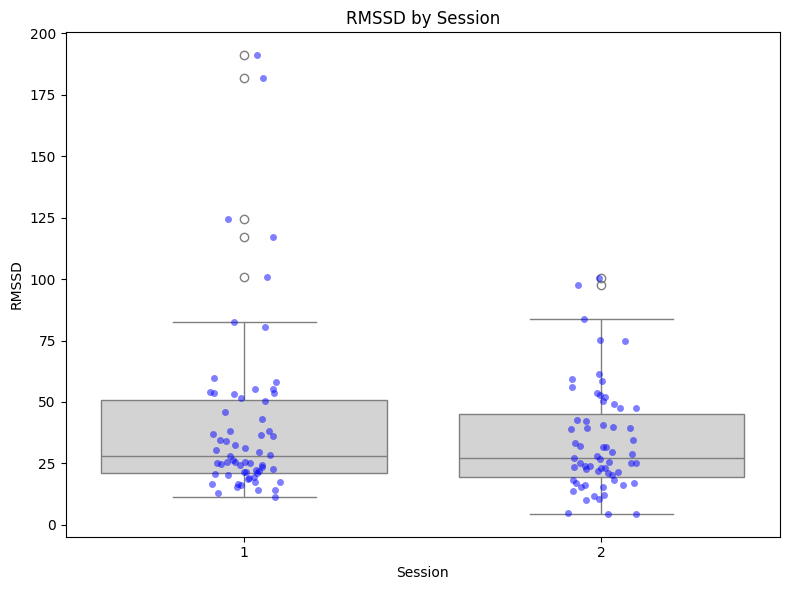

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV data
df = df_30[df_30['scene'] == 'elevated_platform']

# Create a simple figure
plt.figure(figsize=(8, 6))

# Create a basic boxplot with data points
sns.boxplot(x='session', y='rmssd', data=df, color='lightgray')

# Add individual data points (stripplot)
sns.stripplot(x='session', y='rmssd', data=df, 
              color='blue', alpha=0.5, jitter=True)

# Set labels and title
plt.xlabel('Session')
plt.ylabel('RMSSD')
plt.title('RMSSD by Session')
plt.tight_layout()

# Save the figure
plt.savefig('rmssd_by_session_simple.png')
plt.show()

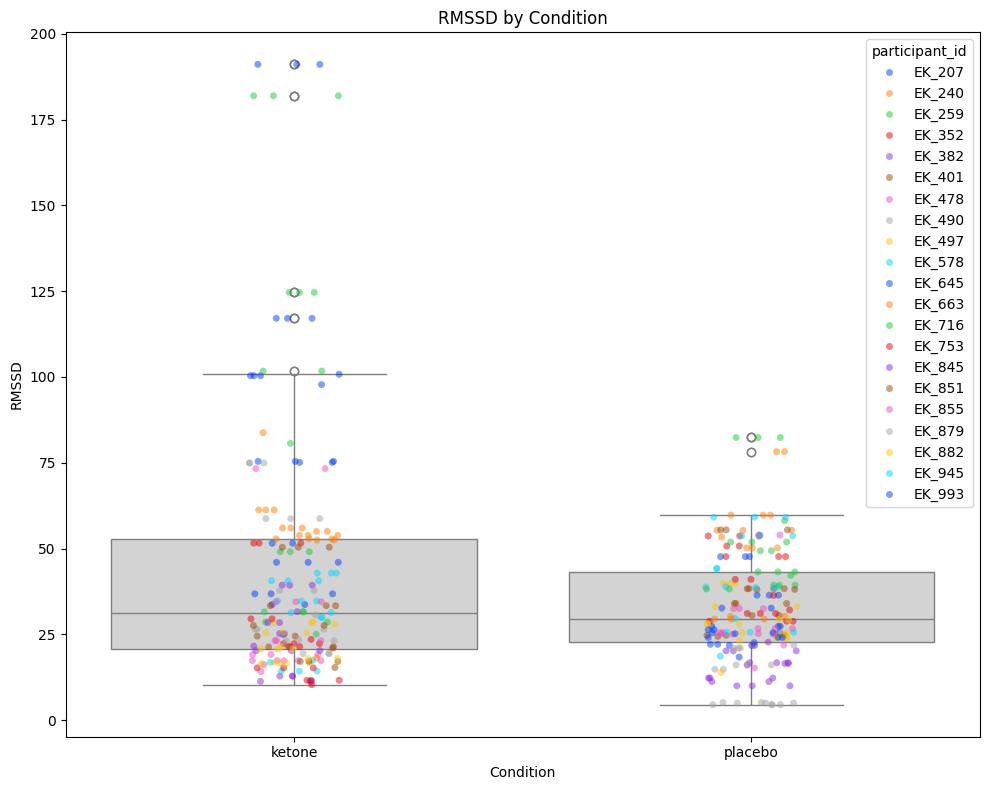

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV data
df = df_30

# Create a simple figure
fig, ax = plt.subplots(figsize=(10, 8))

# Create a basic boxplot
sns.boxplot(x='drink', y='rmssd', hue='drink', data=df, color='lightgray')

# Add individual data points (stripplot)
sns.stripplot(x='drink', y='rmssd', hue= 'participant_id', data=df, 
               alpha=0.5, palette='bright', jitter=True)

# sns.pointplot(x='drink', y='rmssd', hue='participant_id', data=df,
#               palette="bright", markers="", linestyles="-", ax=ax)

# handles, labels = ax.get_legend_handles_labels()
# n_participants = len(df['participant_id'].unique())
# ax.legend(handles[:n_participants], labels[:n_participants], title='participant_id')

# Set labels and title
plt.xlabel('Condition')
plt.ylabel('RMSSD')
plt.title('RMSSD by Condition')
plt.tight_layout()

plt.show()

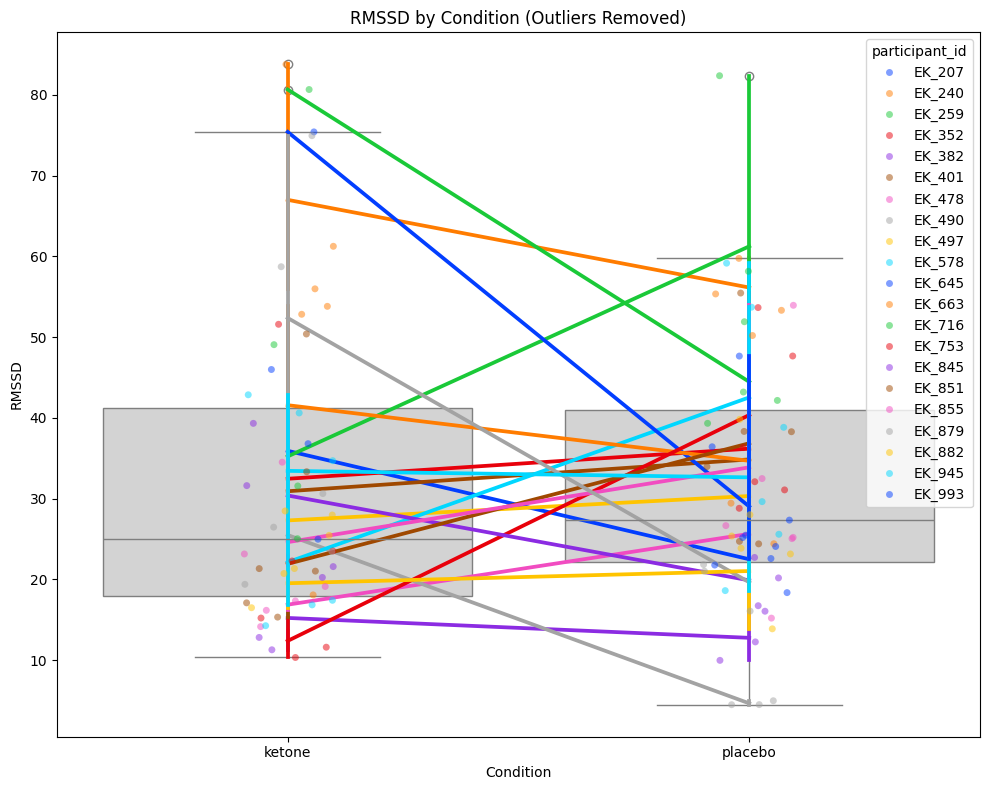

Original data points: 126
After removing outliers: 119
Outliers removed: 7


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV data
df = df_30[df_30['scene'] == 'elevated_platform']

# Calculate IQR for RMSSD
Q1 = df['rmssd'].quantile(0.25)
Q3 = df['rmssd'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df_filtered = df[(df['rmssd'] >= lower_bound) & (df['rmssd'] <= upper_bound)]

# Create a figure
fig, ax = plt.subplots(figsize=(10, 8))

# Create boxplot
sns.boxplot(x='drink', y='rmssd', data=df_filtered, color='lightgray')

# Add individual data points
sns.stripplot(x='drink', y='rmssd', hue='participant_id', data=df_filtered, 
              alpha=0.5, palette='bright', jitter=True)

# Add lines connecting points
sns.pointplot(x='drink', y='rmssd', hue='participant_id', data=df_filtered,
              palette="bright", markers="", linestyles="-", ax=ax)

# Clean up legend
handles, labels = ax.get_legend_handles_labels()
n_participants = len(df_filtered['participant_id'].unique())
ax.legend(handles[:n_participants], labels[:n_participants], title='participant_id')

# Set labels and title
ax.set_xlabel('Condition')
ax.set_ylabel('RMSSD')
ax.set_title('RMSSD by Condition (Outliers Removed)')
plt.tight_layout()

plt.show()

# Print info about removed outliers
print(f"Original data points: {len(df)}")
print(f"After removing outliers: {len(df_filtered)}")
print(f"Outliers removed: {len(df) - len(df_filtered)}")

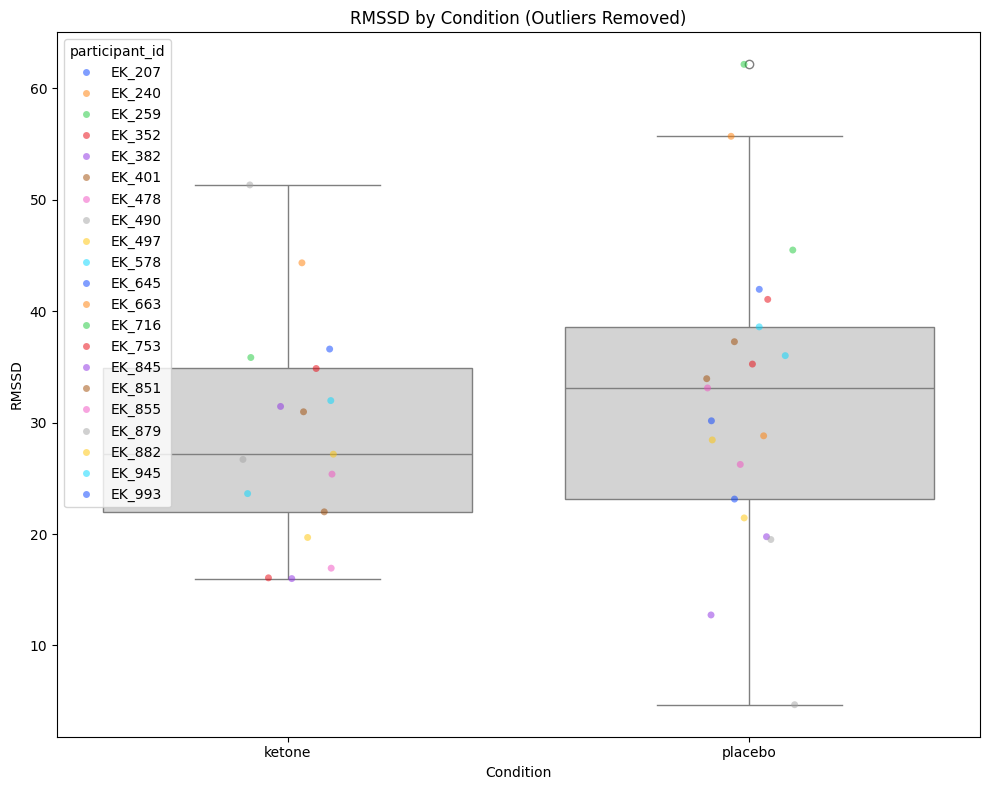

Original data points: 42
After removing outliers: 38
Outliers removed: 4


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV data
df = df_90[df_90['scene'] == 'elevated_platform']

# Calculate IQR for RMSSD
Q1 = df['rmssd'].quantile(0.25)
Q3 = df['rmssd'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df_filtered = df[(df['rmssd'] >= lower_bound) & (df['rmssd'] <= upper_bound)]

# Create a figure
fig, ax = plt.subplots(figsize=(10, 8))

# Create boxplot
sns.boxplot(x='drink', y='rmssd', data=df_filtered, color='lightgray')

# Add individual data points
sns.stripplot(x='drink', y='rmssd', hue='participant_id', data=df_filtered, 
              alpha=0.5, palette='bright', jitter=True)

# Add lines connecting points
# sns.pointplot(x='drink', y='rmssd', hue='participant_id', data=df_filtered,
#               palette="bright", markers="", linestyles="-", ax=ax)

# # Clean up legend
# handles, labels = ax.get_legend_handles_labels()
# n_participants = len(df_filtered['participant_id'].unique())
# ax.legend(handles[:n_participants], labels[:n_participants], title='participant_id')

# Set labels and title
ax.set_xlabel('Condition')
ax.set_ylabel('RMSSD')
ax.set_title('RMSSD by Condition (Outliers Removed)')
plt.tight_layout()

plt.show()

# Print info about removed outliers
print(f"Original data points: {len(df)}")
print(f"After removing outliers: {len(df_filtered)}")
print(f"Outliers removed: {len(df) - len(df_filtered)}")

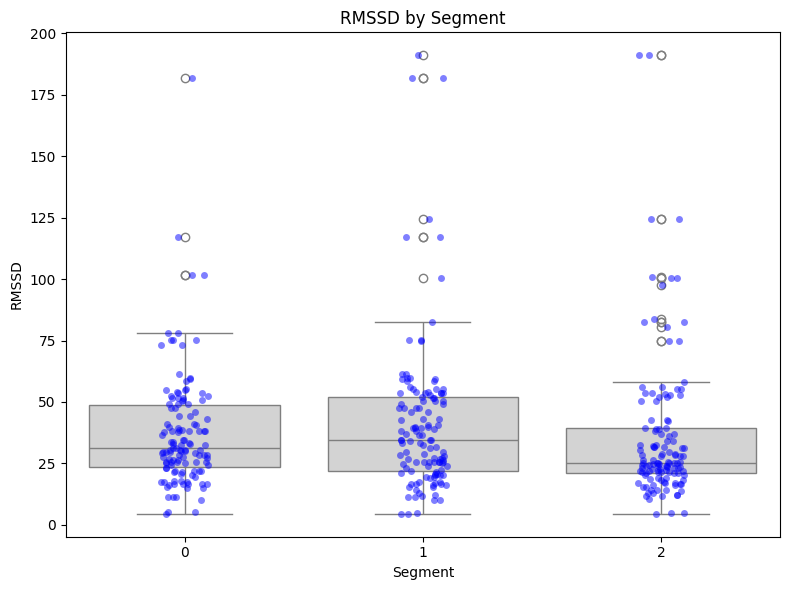

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV data
df = df_30

# Create a simple figure
plt.figure(figsize=(8, 6))

# Create a basic boxplot
sns.boxplot(x='segment', y='rmssd', data=df, color='lightgray')

# Add individual data points (stripplot)
sns.stripplot(x='segment', y='rmssd', data=df, 
              color='blue', alpha=0.5, jitter=True)

# Set labels and title
plt.xlabel('Segment')
plt.ylabel('RMSSD')
plt.title('RMSSD by Segment')
plt.tight_layout()

# Save the figure
plt.savefig('rmssd_by_segment_simple.png')
plt.show()